Felipe Bartelt de Assis Pessoa - 2016026841

#  Modelo Univariado

Primeiramente os dados foram carregados e o gráfico da entrada e saída em função do tempo foi plotado, de forma a se visualizar seu comportamento:

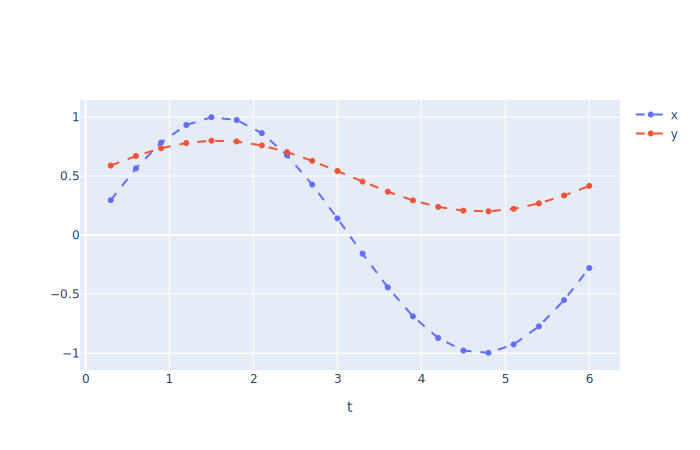

In [11]:
import numpy as np
import plotly.graph_objects as go

t = np.reshape(np.loadtxt('Ex1_t.txt', skiprows = 1, usecols = (1)),(-1,1))
x = np.reshape(np.loadtxt('Ex1_x.txt', skiprows = 1, usecols = (1)),(-1,1))
y = np.reshape(np.loadtxt('Ex1_y.txt', skiprows = 1, usecols = (1)),(-1,1))
fig1 = go.Figure(go.Scatter(x=t.flatten(), y=x.flatten(), mode='lines+markers', line = {'dash':'dash'}, name='x'))
fig1.add_trace(go.Scatter(x=t.flatten(), y=y.flatten(),mode='lines+markers', line = {'dash':'dash'}, name='y'))
fig1.update_layout(xaxis={'title':'t'})
fig1.show(renderer = 'svg')



Definiu-se a função para o problema como $J = \frac{1}{2N}\sum_{i=1}^N(y_i-\widehat{y}_i)^2$, ou seja a função de custo quadrática. 

Em seguida, definiu-se uma função para treinamento do Adaline `train_adaline` baseada no gradiente descendente, com parâmetros de entrada obrigatórios `x_train, y_train` e parâmetros opcionais `init_w, eta, tol, max_iter`, que são: o vetor inicial de pesos, o passo do gradiente descendente, a tolerância e o número máximo de iterações, respectivamente. Caso o vetor de pesos iniciais não seja fornecido, ele é iniciado como uma distribuição uniforme entre $[-\epsilon,\epsilon]$, onde $\epsilon = \frac{\sqrt{6}}{\sqrt{L_{in}+L_{out}}}$, sendo $L_{in}$ o número de neurônios na camada anterior e $L_{out}$ o número de neurônios da camada posterior. A função entra, então, em um loop `while` que roda enquanto o número de iteração `itern<max_iter` e o erro `err>tol`, como default `max_iter=500, tol=1e-5`. Esse loop busca minimizar a função de custo definida, atualizando o vetor de pesos por meio do gradiente descendente, o que pode ser representado matricialmente por $w = w -\frac{\eta}{N}\left(x^T(\widehat{y}-y)\right)$, onde $\eta$ é o passo do gradiente descendente e $N$ o número de amostras.

Com o algoritmo de treinamento definido, treinou-se a rede neural utilizando todas as amostras fornecidas, embaralhadas antes do treinamento para evitar qualquer viés e o vetor de pesos ideal foi obtido no formato $\begin{bmatrix}w_0&w_1&\dots&w_n\end{bmatrix}^T$ para a aproximação $y = a+b\cdot x$

In [12]:
def costfunction(y, y_hat):
    N = np.shape(y)[0]
    return 1/(2*N)*(y - y_hat).T @ (y - y_hat)

def train_adaline(x_train, y_train, init_w=None, eta=0.1, tol=1e-5, max_iter = 500):
    # Minimize defined costfunction based on gradient descendent
    N = np.shape(x_train)[0]
    err = 0

    if init_w is None:
        Lin, Lout = np.shape(x_train)[1], np.shape(y_train)[1]
        epsilon = np.sqrt(6)/np.sqrt(Lin+Lout)
        init_w =  np.random.default_rng().uniform(-epsilon,epsilon,(Lin,Lout))

    w = init_w
    itern, err = 0, tol+1
    while (itern < max_iter) and (err > tol):
        y_hat = x_train @ w
        err = costfunction(y_train, y_hat)
        w = w - eta/N*(x_train.T @ (y_hat - y_train))
        itern += 1

    print('# of iterations:', itern, '\nFinal error:', err.ravel())
    return w

N = np.shape(x)[0]
X = np.append(np.ones((N,1)), x, axis =1)

rand_idx = np.arange(0,N)
np.random.default_rng().shuffle(rand_idx)
x_train = X[rand_idx,:]
y_train = y[rand_idx,:]

w = train_adaline(x_train, y_train)
print('w =',w)


# of iterations: 88 
Final error: [9.05629548e-06]
w = [[0.49996299]
 [0.30557308]]



Para se testar a rede neural, é necessário dados de entrada não utilizados para treinamento. Dessa forma, aproximou-se a função senoidal de entrada por $x'(t)=\sin\left(\frac{2\pi}{\max(\tau)+\min(\tau)}t\right)$, onde $\tau$ é o conjunto de tempos de amostragem fornecidos. Essa aproximação se mostra satisfatória e é mostrada a seguir, sendo que a aproximação tomada tem período de amostragem $T_s = T_\tau/2$, ou seja metade do período de amostragem dos dados fornecidos:

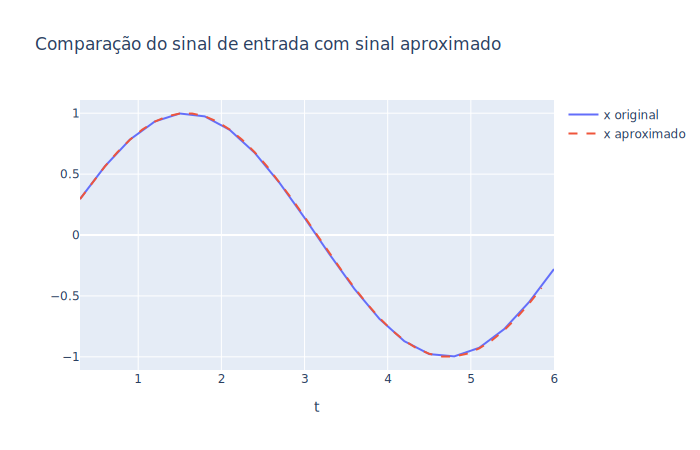

In [13]:
Ts = (t[2] - t[1])/2
sample_times = np.arange(min(t), max(t), Ts)
x_approx = np.reshape(np.sin(2*np.pi*1/(min(t) + max(t))*(sample_times)), (-1,1))

fig2 = go.Figure(go.Scatter(x=t.flatten(),y=x.flatten(), name='x original'))
fig2.add_trace(go.Scatter(x=sample_times.flatten(), y=x_approx.flatten(), name='x aproximado', line={'dash':'dash'}))
fig2.update_layout(xaxis={'title':'t'}, title={'text':'Comparação do sinal de entrada com sinal aproximado'})
fig2.show(renderer = 'svg')


Obteve-se a resposta aos valores de entrada de teste, aproximados anteriormente e obteve-se uma previsão $\widehat{y}_{test}$ bastante próxima a resposta original do sistema:

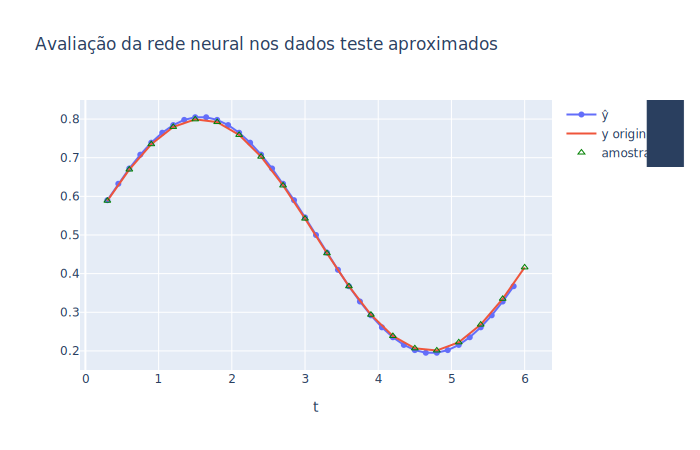

In [14]:
N_test = np.shape(x_approx)[0]
x_test = np.append(np.ones((N_test,1)),x_approx, axis=1)
y_hat_test = x_test @ w

fig3 = go.Figure(go.Scatter(x=sample_times.flatten(), y=y_hat_test.flatten(), name = 'ŷ<sub>test</sub>', mode = 'lines+markers'))
fig3.add_trace(go.Scatter(x=t.flatten(),y=y.flatten(), name = 'y original'))
fig3.add_trace(go.Scatter(x=t.flatten(),y=y.flatten(), mode='markers', marker={'symbol':'triangle-up-open', 'color':'green'}, name='amostras y<sub>train</sub>'))
fig3.update_layout(xaxis={'title':'t'},title={'text':'Avaliação da rede neural nos dados teste aproximados'})
fig3.show(renderer = 'svg')

# Modelo Multivariado

Após carregar os dados, plotou-se os gráficos das amostras $x_1,x_2,x_3$ e resposta $y$ em função do tempo, de forma a visualizar seu comportamento:

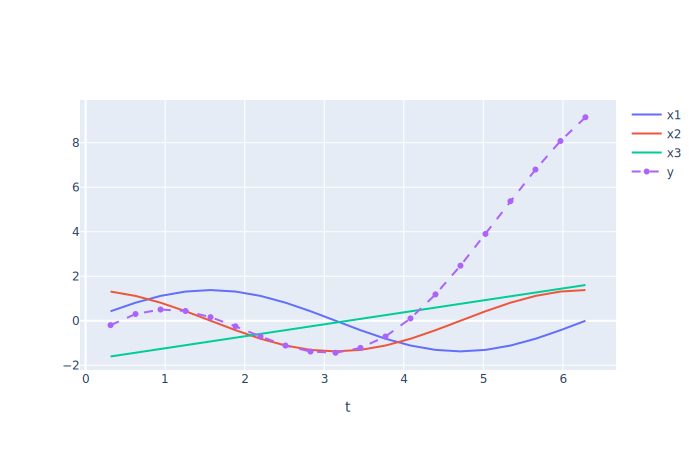

In [15]:
t2 = np.reshape(np.loadtxt('t.txt', skiprows = 1, usecols = (1)),(-1,1))
x2 = np.reshape(np.loadtxt('x.txt', skiprows = 1, usecols = (1,2,3)),(-1,3))
y2 = np.reshape(np.loadtxt('y.txt', skiprows = 1, usecols = (1)),(-1,1))

fig4 = go.Figure(go.Scatter(x=t2.flatten(), y=x2[:,0].flatten(), mode='lines', name='x1'))
fig4.add_trace(go.Scatter(x=t2.flatten(), y=x2[:,1].flatten(), mode='lines', name='x2'))
fig4.add_trace(go.Scatter(x=t2.flatten(), y=x2[:,2].flatten(), mode='lines', name='x3'))
fig4.add_trace(go.Scatter(x=t2.flatten(), y=y2.flatten(),mode='lines+markers', line = {'dash':'dash'}, name='y'))
fig4.update_layout(xaxis={'title':'t'})
fig4.show(renderer = 'svg')


Em seguida, treinou-se a rede neural com todos os dados fornecidos por meio da função `train_adaline` definida anteriormente, sendo os dados de entrada foram novamente embaralhados para evitar qualquer viés. O erro final do modelo $y= a+b\cdot x_1+c\cdot x_2+d\cdot x_3$, assim como o vetor de pesos, cujo formato é $\begin{bmatrix}w_0&w_1&\dots&w_n\end{bmatrix}^T$, obtido é mostrado a seguir:

In [16]:
N = np.shape(x2)[0]
X = np.append(np.ones((N,1)), x2, axis =1)
rand_idx = np.arange(0,N)
np.random.default_rng().shuffle(rand_idx)
x_train = X[rand_idx,:]
y_train = y2[rand_idx,:]

w = train_adaline(x_train, y_train)
print('w=',w)

# of iterations: 278 
Final error: [9.95343063e-06]
w= [[1.57079633]
 [0.99326402]
 [2.00106688]
 [2.99318005]]



Para se testar o modelo, interpolou-se os dados de entrada fornecidos por meio de splines cúbicos, utilizando cada dado $x_n$ e os tempos de amostragem. O período de amostragem adotado foi o dobro do original. Os pontos obtidos via interpolação são mostrados a seguir, junto dos pontos originais:

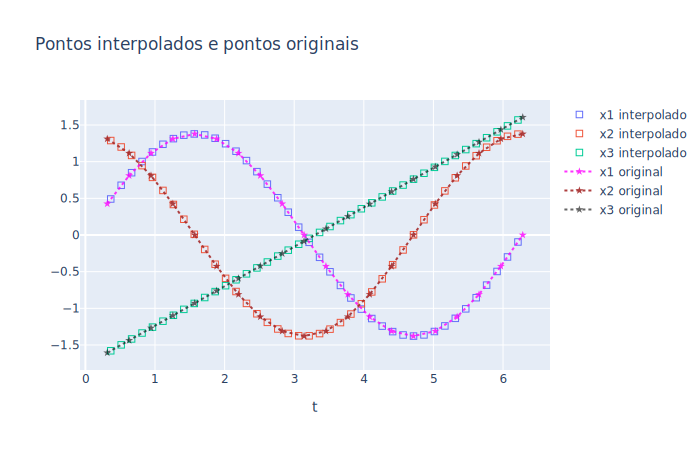

In [19]:
from scipy.interpolate import interp1d

Ts= (t[1]-t[0])/2
sample_times = np.arange(min(t2)+0.05,max(t2),Ts)
interp0 = interp1d(t2.flatten(),x2[:,0].flatten(),'cubic')
interp1 = interp1d(t2.flatten(),x2[:,1].flatten(),'cubic')
interp2 = interp1d(t2.flatten(),x2[:,2].flatten(),'cubic')
xt0 = np.reshape(interp0(sample_times),(-1,1))
xt1 = np.reshape(interp1(sample_times),(-1,1))
xt2 = np.reshape(interp2(sample_times),(-1,1))

fig5 = go.Figure(go.Scatter(x=sample_times.flatten(),y=xt0.flatten(), mode = 'markers', line={'dash':'solid'}, marker={'symbol':'square-open', 'size':6.5}, name='x1 interpolado'))
fig5.add_trace(go.Scatter(x=sample_times.flatten(),y=xt1.flatten(), mode = 'markers', line={'dash':'solid'}, marker={'symbol':'square-open', 'size':6.5}, name='x2 interpolado'))
fig5.add_trace(go.Scatter(x=sample_times.flatten(),y=xt2.flatten(), mode = 'markers', line={'dash':'solid'}, marker={'symbol':'square-open', 'size':6.5}, name='x3 interpolado'))
fig5.add_trace(go.Scatter(x=t2.flatten(), y=x2[:,0].flatten(),line={'dash':'dot', 'color':'magenta'}, mode = 'lines+markers', marker={'symbol':'star'}, opacity=0.8, name='x1 original'))
fig5.add_trace(go.Scatter(x=t2.flatten(), y=x2[:,1].flatten(),line={'dash':'dot', 'color':'brown'}, mode = 'lines+markers', marker={'symbol':'star'}, opacity=0.9, name='x2 original'))
fig5.add_trace(go.Scatter(x=t2.flatten(), y=x2[:,2].flatten(),line={'dash':'dot', 'color':'black'}, mode = 'lines+markers', marker={'symbol':'star'}, opacity=0.6, name='x3 original'))
fig5.update_layout(xaxis={'title':'t'}, title={'text':'Pontos interpolados e pontos originais'})
fig5.show(renderer = 'svg')


Obteve-se então a previsão do modelo $\widehat{y}_{test}$ com base nos dados interpolados e sua resposta foi muito próxima da resposta original:

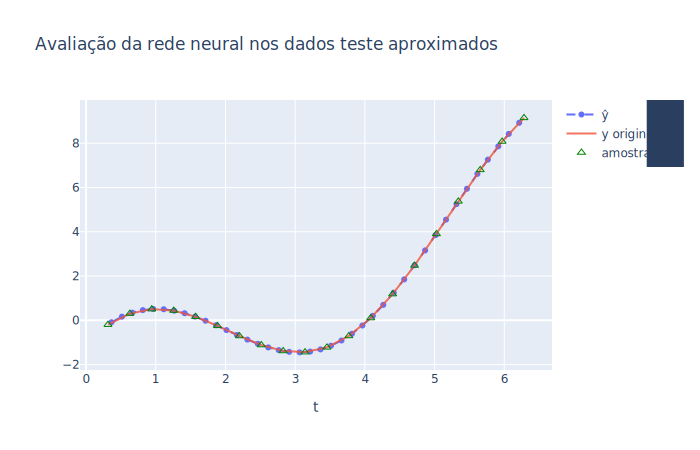

In [21]:
x_test = np.append(np.append(xt0,xt1,axis=1),xt2, axis =1)
N_test = np.shape(x_test)[0]
x_test = np.append(np.ones((N_test,1)), x_test,axis=1)
y_hat = x_test @ w

fig6 = go.Figure(go.Scatter(x=sample_times.flatten(), y=y_hat.flatten(), mode='lines+markers', line={'dash':'dash'}, name='ŷ<sub>test</sub>'))
fig6.add_trace(go.Scatter(x = t2.flatten(), y=y2.flatten(), opacity=0.8, name='y original'))
fig6.add_trace(go.Scatter(x = t2.flatten(), y=y2.flatten(), mode='markers', marker={'symbol':'triangle-up-open', 'size':7, 'color':'green'}, name='amostras y<sub>train</sub>'))
fig6.update_layout(xaxis={'title':'t'},title={'text':'Avaliação da rede neural nos dados teste aproximados'})
fig6.show(renderer = 'svg')